In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
try:
        data = pd.read_csv("train.csv")
        print(data.describe(),"\n")
except Exception as e:
        print("Error! data not  found.")

            pixel_0      pixel_1       pixel_2       pixel_3       pixel_4  \
count  50000.000000  50000.00000  50000.000000  50000.000000  50000.000000   
mean     130.710740    130.14036    131.050440    131.568860    132.184700   
std       73.412873     72.44259     72.240546     72.016555     71.714551   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%       71.000000     71.00000     73.000000     73.000000     75.000000   
50%      128.000000    127.00000    129.000000    130.000000    130.000000   
75%      189.000000    188.00000    188.000000    188.000000    189.000000   
max      255.000000    255.00000    255.000000    255.000000    255.000000   

            pixel_5       pixel_6       pixel_7       pixel_8      pixel_9  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.00000   
mean     132.851840    133.371540    133.890920    134.485040    134.93260   
std       71.537505     71.353558     71.281237     71.071698  

In [3]:
try:
        test = pd.read_csv("test.csv")
        print(test.describe(),"\n")
except Exception as e:
        print("Error! data not  found.")

            pixel_0       pixel_1       pixel_2       pixel_3     pixel_4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0000   
mean     130.535400    129.993900    131.145000    132.146800    132.9294   
std       73.333214     72.397388     72.288499     71.739001     71.3252   
min        0.000000      0.000000      0.000000      0.000000      0.0000   
25%       70.000000     71.000000     73.000000     75.000000     76.0000   
50%      127.000000    127.000000    128.000000    129.000000    130.0000   
75%      188.000000    187.000000    189.000000    190.000000    190.0000   
max      255.000000    255.000000    255.000000    255.000000    255.0000   

            pixel_5       pixel_6       pixel_7      pixel_8       pixel_9  \
count  10000.000000  10000.000000  10000.000000  10000.00000  10000.000000   
mean     133.538900    134.117600    134.701800    135.26150    135.709000   
std       71.209804     71.014037     71.088556     70.97164     71.0044

In [15]:
X = data.drop(columns=['label'])
y = data['label']
y

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

In [16]:
def check_missing_values():
    missing = X.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing)
    else:
        print("\n No Missing Data \n")

def detect_outliers(z_thresh=3.29):
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            z_scores = zscore(X[col])
            outliers = (abs(z_scores) > z_thresh)
            num_outliers = outliers.sum()
            # rint(f"col '{col}': {num_outliers} outlier found.")
            #filtered_data = data[np.abs(z_scores) <= z_thresh]
def normal(X):
    return X.reshape(X.shape[0], -1).astype(np.float32) / 255.0

def plot_distributions():
    for col in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[col]):
            plt.figure(figsize=(6,4))
            sns.histplot(X_train[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()
        else:
          print("\n",col, "is not numeric")

In [17]:
check_missing_values()
detect_outliers()


 No Missing Data 



In [18]:
y = np.where(data['label'] == 0, 1, 0)
print(y)

[0 0 0 ... 0 0 0]


In [19]:
X = X.to_numpy().reshape(X.shape[0], -1)
#y = y.to_numpy()
X = normal(X)
X

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.54901963, 0.32941177,
        0.28235295],
       [0.6039216 , 0.49411765, 0.4117647 , ..., 0.54509807, 0.5568628 ,
        0.5647059 ],
       [1.        , 0.99215686, 0.99215686, ..., 0.3254902 , 0.3254902 ,
        0.32941177],
       ...,
       [0.13725491, 0.15686275, 0.16470589, ..., 0.3019608 , 0.25882354,
        0.19607843],
       [0.7411765 , 0.7294118 , 0.7254902 , ..., 0.6627451 , 0.67058825,
        0.67058825],
       [0.8980392 , 0.9254902 , 0.91764706, ..., 0.6784314 , 0.63529414,
        0.6313726 ]], dtype=float32)

In [21]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
)
print(X_train)

[[0.13333334 0.14509805 0.17254902 ... 0.19215687 0.1882353  0.22745098]
 [0.35686275 0.37254903 0.36078432 ... 0.2901961  0.4745098  0.5254902 ]
 [0.8156863  0.7764706  0.6431373  ... 0.6392157  0.64705884 0.6156863 ]
 ...
 [0.41960785 0.49803922 0.45882353 ... 0.13333334 0.13333334 0.13333334]
 [1.         1.         1.         ... 0.21960784 0.23137255 0.23921569]
 [0.73333335 0.77254903 0.78431374 ... 0.37254903 0.40392157 0.41568628]]


In [22]:
X.shape

(50000, 3072)

In [23]:
y.shape

(50000,)

In [24]:
print("not airplain:", np.sum(y_train == 0))
print("airplain:", np.sum(y_train == 1))

not airplain: 35973
airplain: 4027


In [25]:
#y = np.array(y).astype(np.float32)

In [26]:
def sigmoid_activation_function(z):
        return sigmoid(z) * (1 - sigmoid(z))

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [34]:
def binary_cross_entropy(y_true, y_pred):
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce

In [35]:
def forward(X, y, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)

def compute_loss(y_true, y_pred):
        return binary_cross_entropy(y, y_pred)

def backward(X, y, W, b, lr, loss, y_pred):
    dz = y_pred - y
    dw = np.dot(X.T,dz)/X.shape[0]
    db= np.mean(dz)

    W  -= lr * dw
    b -= lr * db

    return W, b
def params(X):
    W = np.random.normal(0, 1/np.sqrt(X.shape[1]), size=X.shape[1])
    b = 0
    return W,b

def train(X, y, X_test, y_test, epochs=100, lr=0.1):
    W, b = params(X)
    
    history = {
        'train_loss': [],
        'test_loss': [],
        'accuracy': []
    }
    
    for epoch in range(epochs):
        # Forward pass (train)
        y_pred_train = forward(X, y, W, b)
        train_loss = binary_cross_entropy(y, y_pred_train)
        
        # Backward pass
        W, b = backward(X, y, W, b, lr, train_loss, y_pred_train)
        
        # Evaluation on test set
        #y_pred_test = forward(X_test, y_test, W, b)
        test_loss = 0# binary_cross_entropy(y_test, y_pred_test)
        accuracy = 0#np.mean((y_pred_test >= 0.5).astype(int) == y_test)
        
        # Store history
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['accuracy'].append(accuracy)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch:3d} | Train Loss: {train_loss}")
    
    return W, b, history
        
         

In [36]:
def predict(X, W, b):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)


In [37]:
def evaluate(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1_score = 2 * precision * recall / (precision + recall + 1e-8)

    print("Confusion Matrix:")
    print(f"TP: {TP}, FP: {FP}")
    print(f"FN: {FN}, TN: {TN}")
    print(f"F1-score: {f1_score}")


In [44]:
W , b, h= train(X_train, y_train, X_test, y_test, 900, 0.01)
y_pred = predict(X_test, W, b)
evaluate(y_test, y_pred)
#y_pred = predict(test)

Epoch   0 | Train Loss: 0.6945035602388231
Epoch  10 | Train Loss: 0.3644152141134638
Epoch  20 | Train Loss: 0.3533522647386308
Epoch  30 | Train Loss: 0.3449071651508065
Epoch  40 | Train Loss: 0.33826247747310734
Epoch  50 | Train Loss: 0.3329039051481242
Epoch  60 | Train Loss: 0.3284987096940442
Epoch  70 | Train Loss: 0.32482332510329
Epoch  80 | Train Loss: 0.32172132354807154
Epoch  90 | Train Loss: 0.3190789831365999
Epoch 100 | Train Loss: 0.31681084500346185
Epoch 110 | Train Loss: 0.31485093459142244
Epoch 120 | Train Loss: 0.31314723387245147
Epoch 130 | Train Loss: 0.31165806042632005
Epoch 140 | Train Loss: 0.31034959841099896
Epoch 150 | Train Loss: 0.3091941503402734
Epoch 160 | Train Loss: 0.30816885767978336
Epoch 170 | Train Loss: 0.3072547385230641
Epoch 180 | Train Loss: 0.30643594775524213
Epoch 190 | Train Loss: 0.30569919847957044
Epoch 200 | Train Loss: 0.3050333035478586
Epoch 210 | Train Loss: 0.304428808518109
Epoch 220 | Train Loss: 0.3038776954156142
Epoc

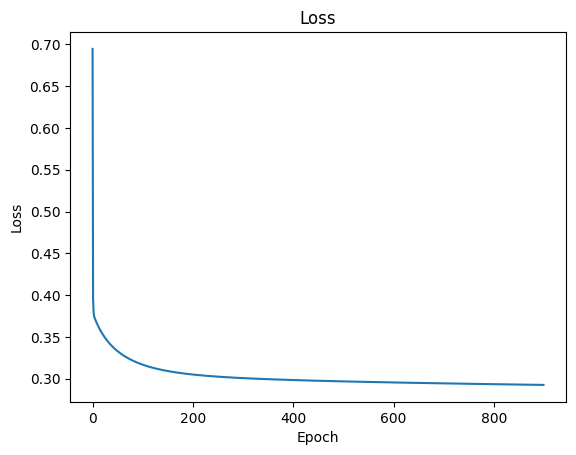

In [48]:
plt.plot(h['train_loss'], label='Train Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()